**IMPORTING LIBRARYS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading data set** (importing dataset)

In [ ]:
#Reading All the Files
data_set = pd.read_csv('/content/drive/MyDrive/ML PROJECT FILES/StudentsPerformance.csv')


**Visulization Of Dataset**

In [ ]:
data_set.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Visulizing Size Of Dataset**

In [ ]:
print(data_set.size)

8000


In [ ]:
print(data_set.shape)

(1000, 8)


**Finding Missing Values**

In [ ]:
data_set.isnull().sum() # total null values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
data_set.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
data_set.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


**Ecoding Dataset Lunch colume**

In [ ]:
# Converting String to float
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X = data_set.iloc[:,3].values
data_set.iloc[:,3] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)
 

In [ ]:
data_set.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,1,none,72,72,74
1,female,group C,some college,1,completed,69,90,88
2,female,group B,master's degree,1,none,90,95,93
3,male,group A,associate's degree,0,none,47,57,44
4,male,group C,some college,1,none,76,78,75


**Lableing Requird Columns with variables**

In [ ]:
data_set.heatrain = data_set[['lunch' ,'math score' ,'reading score' ,'writing score']]

y = data_set[['lunch']]
X = data_set[['math score' ,'reading score' ,'writing score']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)

**Scaling data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_min= mms.fit_transform(X_train)
X_test_min = mms.transform(X_test)
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train_norm = independent_scaler.fit_transform(X_train)
X_test_norm = independent_scaler.transform(X_test)
from sklearn.decomposition import PCA
pca = PCA(n_components =2)              # Convert All the columns into two components/columns
X_train_pca = pca.fit_transform(X_train_norm)
X_test_pca =pca.transform(X_train_norm)
X_train_pca = pca.fit_transform(X_test_norm)
X_test_pca =pca.transform(X_test_norm)
pca.explained_variance_ratio_





array([0.90716762, 0.07988343])

**MODELS WITH MIN-MAX**

0.708
              precision    recall  f1-score   support

    standerd       0.65      0.29      0.40        84
not standerd       0.72      0.92      0.81       166

    accuracy                           0.71       250
   macro avg       0.68      0.60      0.60       250
weighted avg       0.69      0.71      0.67       250



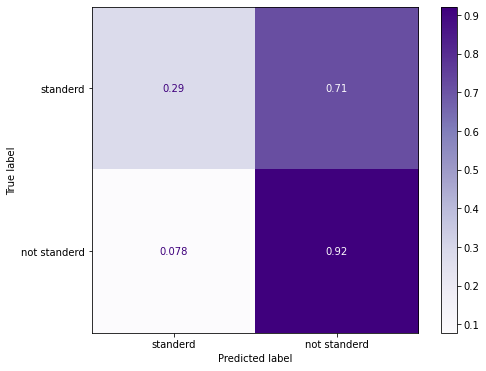

In [ ]:
#Decision Tree MINMAX  # Criteria = gini,entropy
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 1, random_state = 0)
dt.fit(X_train_min , Y_train)

prediction = dt.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction)
print(accuracy)

target_names = ['standerd','not standerd']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Purples')


0.656
              precision    recall  f1-score   support

    standerd       0.49      0.52      0.51        84
not standerd       0.75      0.72      0.74       166

    accuracy                           0.66       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.66      0.66      0.66       250



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


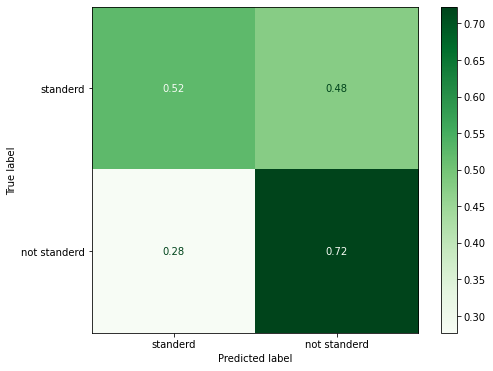

In [ ]:
#knn minmax
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train_min , Y_train)

prediction =knn.predict(X_test_min) 

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

target_names = ['standerd','not standerd']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))   # Reshaping is done to convert the data alignment from horizontal to vertical as excel representation

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.632
              precision    recall  f1-score   support

    standerd       0.44      0.38      0.41        84
not standerd       0.71      0.76      0.73       166

    accuracy                           0.63       250
   macro avg       0.58      0.57      0.57       250
weighted avg       0.62      0.63      0.62       250



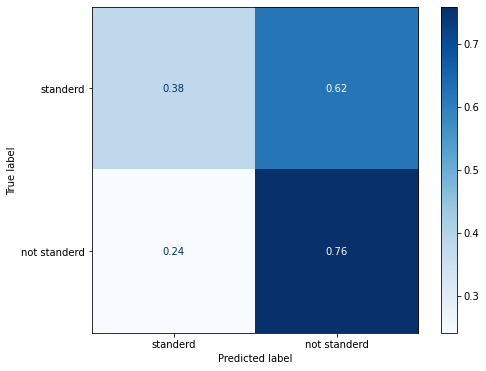

In [ ]:
#Randome Forest minmax
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators =100)
rfc.fit(X_train_min , Y_train)

prediction = rfc.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test , prediction)
print(accuracy)

target_names = ['standerd','not standerd']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

0.624
              precision    recall  f1-score   support

    standerd       0.45      0.60      0.52        84
not standerd       0.76      0.64      0.69       166

    accuracy                           0.62       250
   macro avg       0.61      0.62      0.60       250
weighted avg       0.66      0.62      0.63       250



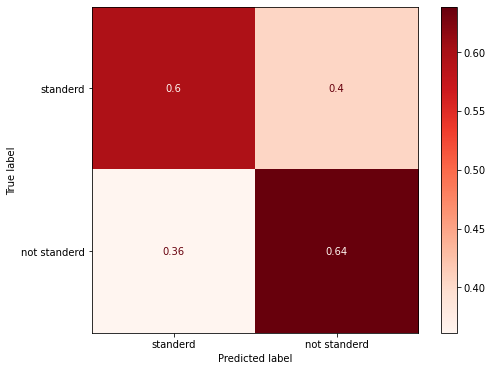

In [ ]:
#kmean min-max
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2  , n_init =10 , random_state =0 )

kmeans.fit(X_train_min,Y_train)
prediction = kmeans.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction)
print(accuracy)

target_names = ['standerd','not standerd']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Reds')


0.68
              precision    recall  f1-score   support

    standerd       0.53      0.44      0.48        84
not standerd       0.74      0.80      0.77       166

    accuracy                           0.68       250
   macro avg       0.63      0.62      0.62       250
weighted avg       0.67      0.68      0.67       250



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


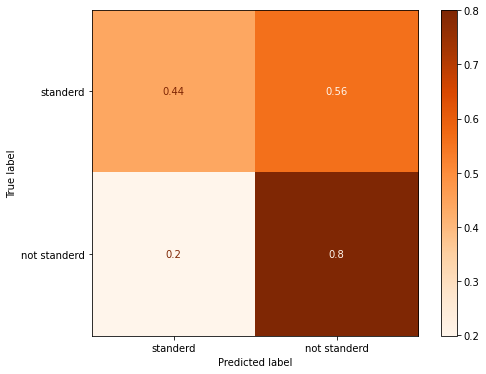

In [ ]:
#navebyes min-max
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_min, Y_train)

prediction = model.predict(X_test_min)
prediction

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

target_names = ['standerd','not standerd']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Oranges')

**MODLES WITH STANDERD SCALLER**

0.708
              precision    recall  f1-score   support

    standerd       0.65      0.29      0.40        84
not standerd       0.72      0.92      0.81       166

    accuracy                           0.71       250
   macro avg       0.68      0.60      0.60       250
weighted avg       0.69      0.71      0.67       250



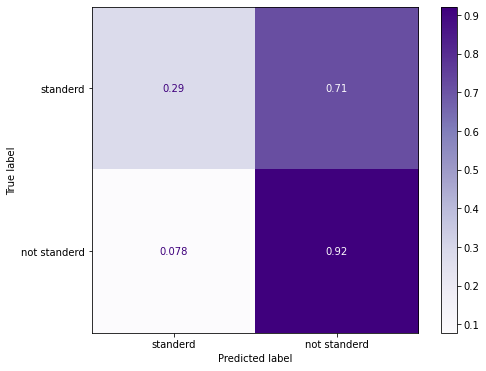

In [ ]:
#Decision Tree standerd scaler
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, random_state = 0)
dt.fit(X_train_norm , Y_train)

prediction = dt.predict(X_test_norm)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction)
print(accuracy)

target_names = ['standerd','not standerd']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Purples')


0.644
              precision    recall  f1-score   support

    standerd       0.47      0.52      0.50        84
not standerd       0.75      0.70      0.72       166

    accuracy                           0.64       250
   macro avg       0.61      0.61      0.61       250
weighted avg       0.65      0.64      0.65       250



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


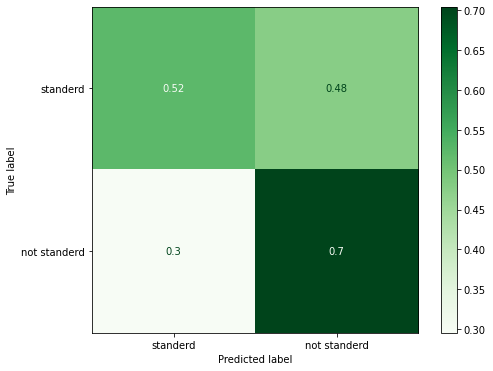

In [ ]:
#knn standerd scaler
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train_norm , Y_train)

prediction =knn.predict(X_test_norm) 

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

target_names = ['standerd','not standerd']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))   # Reshaping is done to convert the data alignment from horizontal to vertical as excel representation

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.636
              precision    recall  f1-score   support

    standerd       0.45      0.40      0.43        84
not standerd       0.71      0.75      0.73       166

    accuracy                           0.64       250
   macro avg       0.58      0.58      0.58       250
weighted avg       0.63      0.64      0.63       250



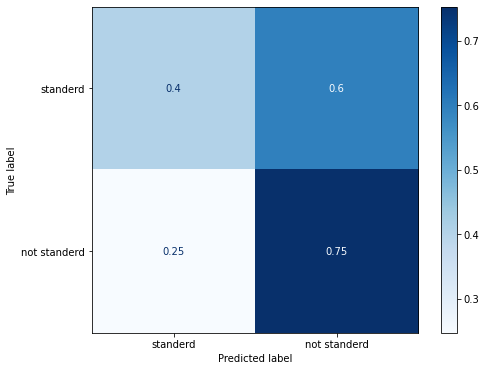

In [ ]:
#Random Forest standerd
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators =100)
rfc.fit(X_train_norm , Y_train)

prediction = rfc.predict(X_test_norm)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test , prediction)
print(accuracy)

target_names = ['standerd','not standerd']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')


0.368
              precision    recall  f1-score   support

    standerd       0.24      0.39      0.29        84
not standerd       0.54      0.36      0.43       166

    accuracy                           0.37       250
   macro avg       0.39      0.37      0.36       250
weighted avg       0.44      0.37      0.38       250



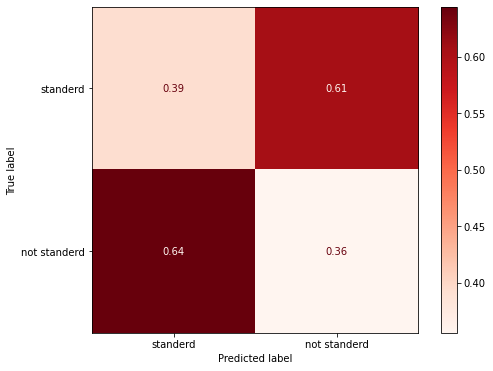

In [ ]:
#kmean standerd
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2  , n_init =10 , random_state =0 )

kmeans.fit(X_train_norm,Y_train)
prediction = kmeans.predict(X_test_norm)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction)
print(accuracy)

target_names = ['standerd','not standerd']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Reds')


0.68
              precision    recall  f1-score   support

    standerd       0.53      0.44      0.48        84
not standerd       0.74      0.80      0.77       166

    accuracy                           0.68       250
   macro avg       0.63      0.62      0.62       250
weighted avg       0.67      0.68      0.67       250



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


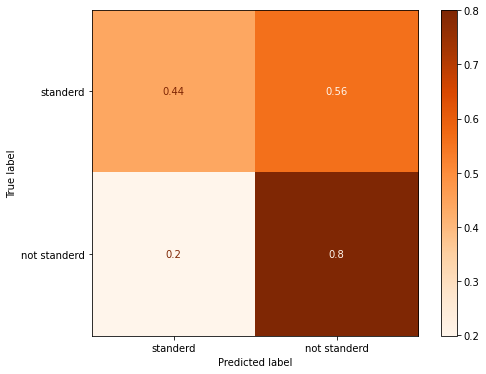

In [ ]:
#navebyes standerd
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_norm, Y_train)

prediction = model.predict(X_test_norm)
prediction

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

target_names = ['standerd','not standerd']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Oranges')

**MODELS WITH PCA SCALLER**

0.708
              precision    recall  f1-score   support

    standerd       0.65      0.29      0.40        84
not standerd       0.72      0.92      0.81       166

    accuracy                           0.71       250
   macro avg       0.68      0.60      0.60       250
weighted avg       0.69      0.71      0.67       250



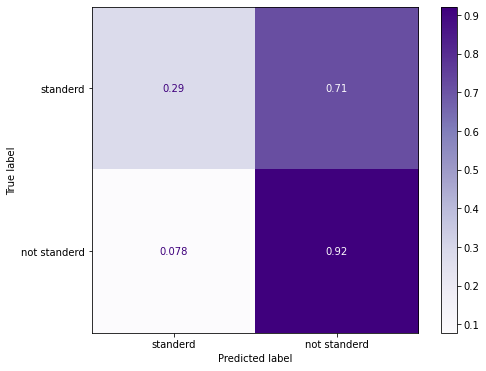

In [ ]:
#DecisionTree pca
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 1, random_state = 0)
dt.fit(X_train, Y_train)

prediction = dt.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction)
print(accuracy)

target_names = ['standerd','not standerd']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Purples')


0.652
              precision    recall  f1-score   support

    survived       0.48      0.52      0.50        84
not survived       0.75      0.72      0.73       166

    accuracy                           0.65       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.66      0.65      0.66       250



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


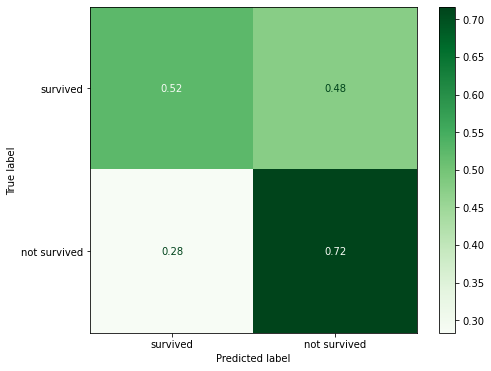

In [ ]:
#knn pca
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, Y_train)

prediction =knn.predict(X_test) 

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))   # Reshaping is done to convert the data alignment from horizontal to vertical as excel representation

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.652
              precision    recall  f1-score   support

    standerd       0.48      0.44      0.46        84
not standerd       0.73      0.76      0.74       166

    accuracy                           0.65       250
   macro avg       0.60      0.60      0.60       250
weighted avg       0.65      0.65      0.65       250



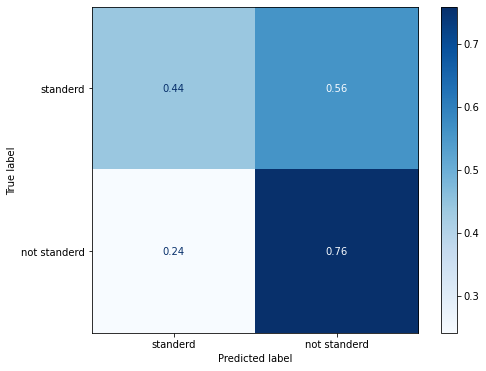

In [ ]:
#Random Forest PCA
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators =100)
rfc.fit(X_train, Y_train)

prediction = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test , prediction)
print(accuracy)

target_names = ['standerd','not standerd']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')


0.62
              precision    recall  f1-score   support

    standerd       0.45      0.62      0.52        84
not standerd       0.76      0.62      0.68       166

    accuracy                           0.62       250
   macro avg       0.61      0.62      0.60       250
weighted avg       0.66      0.62      0.63       250



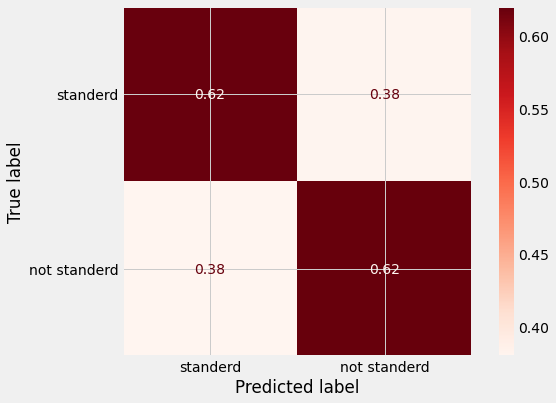

In [ ]:
#KMeans pca
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2  , n_init =10 , random_state =0)

kmeans.fit(X_train_pca,Y_train)
prediction = kmeans.predict(X_test_pca)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction)
print(accuracy)

target_names = ['standerd','not standerd']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Reds')


0.68
              precision    recall  f1-score   support

    standerd       0.53      0.44      0.48        84
not standerd       0.74      0.80      0.77       166

    accuracy                           0.68       250
   macro avg       0.63      0.62      0.62       250
weighted avg       0.67      0.68      0.67       250



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


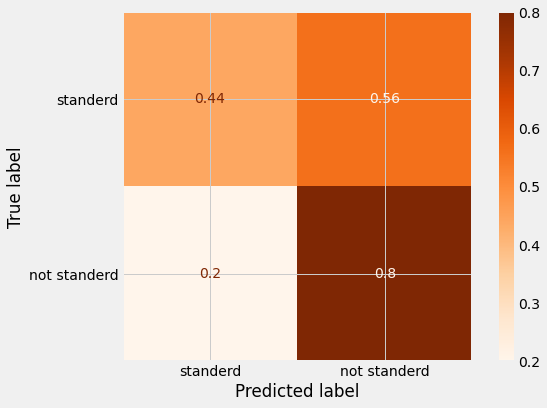

In [ ]:
#navbayes gaussian pca
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)

prediction = model.predict(X_test)
prediction

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

target_names = ['standerd','not standerd']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Oranges')
